In [18]:
import csv
import json
from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Setup

In [6]:
timestamp_directory_path = Path("./training_logs/BipedalWalker-v2/2018-04-19_13:44:21")
parameters_json_file_path = timestamp_directory_path / "parameters.json"
gym_training_directory_path = timestamp_directory_path / "gym_training_logs"
gym_training_logs_json_file_path = gym_training_directory_path / "openaigym.episode_batch.0.13441.stats.json"
gym_testing_directory_path = timestamp_directory_path / "gym_testing_logs"
keras_logs_directory_path = timestamp_directory_path / "keras_logs"
actor_logs_csv_file_path = keras_logs_directory_path / "actor.csv"
critic_logs_csv_file_path = keras_logs_directory_path / "critic.csv"

In [14]:
with parameters_json_file_path.open("r") as parameters_json_fh:
    parameters = json.load(parameters_json_fh)
parameters

{'actor_model_saving_interval': 200,
 'critic_model_saving_interval': 200,
 'discount_factor': 0.99,
 'env': 'BipedalWalker-v2',
 'epochs': 10,
 'horizon': 2048,
 'lambda_value': 0.95,
 'learning_env_seed': 0,
 'learning_env_wrapper': 'reward_scaling_wrapper',
 'log_directory_path': './training_logs',
 'loss_clipping_epsilon': 0.2,
 'lr_actor': 0.0003,
 'lr_critic': 0.0003,
 'make_reproducible': True,
 'minibatch_size': 64,
 'numpy_seed': 0,
 'python_hash_seed': 0,
 'random_seed': 0,
 'reward_scaling_factor': 0.01,
 'tensorflow_seed': 0,
 'test_interval': 50000.0,
 'testing_env_seed': 0,
 'testing_env_wrapper': 'no_wrapper',
 'total_number_of_testing_episodes': 100,
 'total_observations': 5000000.0,
 'var': 0.8325546111576977}

# Rewards per episode during training

In [15]:
with gym_training_logs_json_file_path.open("r") as gym_training_logs_json_fh:
    training_logs = json.load(gym_training_logs_json_fh)

In [16]:
episode_rewards = training_logs_dict["episode_rewards"]
episode_numbers = [i for i in range(len(episode_rewards))]

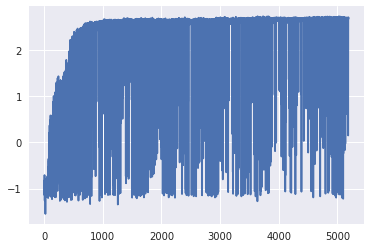

In [19]:
plt.plot(episode_numbers, episode_rewards)

# Rewards per episode during testing

In [24]:
total_observations = int(parameters["total_observations"])
test_interval = int(parameters["test_interval"])

In [36]:
observation_number_at_tests = [i for i in range(test_interval, total_observations + test_interval, test_interval)]
average_reward_per_episode_during_tests = []
for i in range(1, total_observations // test_interval + 1):
    test_logs_json_file_path = gym_testing_directory_path / "openaigym.episode_batch.{0}.{0}.0.stats.json".format(i)
    with test_logs_json_file_path.open("r") as test_logs_json_fh:
        test_logs = json.load(test_logs_json_fh)
    episode_rewards = test_logs["episode_rewards"]
    average_reward = sum(episode_rewards)/float(len(episode_rewards))
    average_reward_per_episode_during_tests.append(average_reward)

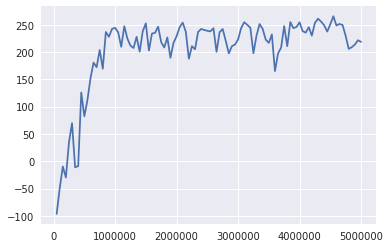

In [37]:
plt.plot(observation_number_at_tests, average_reward_per_episode_during_tests)